# Train cryo-CARE Network

In this notebook we initialize a new model and train it.

In [1]:
from train_cryo_care import CryoCARE
from csbdeep.models import Config
from csbdeep.utils import plot_history

import numpy as np

Using TensorFlow backend.


In [2]:
import tensorflow as tf
tf.test.is_gpu_available()

True

## Create Model

We use the standard `CSBDeep` config.

In [3]:
# We set the 'train_steps_per_epoch' to 75. This way 
# 'train_steps_per_epoch' * 'train_batch_size' = 'num_train_volumes'
# 75 * 16 = 1200
conf = Config(axes='ZYX', train_loss='mse', train_epochs=200, train_steps_per_epoch=75)
vars(conf)

{'n_dim': 3,
 'axes': 'ZYXC',
 'n_channel_in': 1,
 'n_channel_out': 1,
 'train_checkpoint': 'weights_best.h5',
 'train_checkpoint_last': 'weights_last.h5',
 'train_checkpoint_epoch': 'weights_now.h5',
 'probabilistic': False,
 'unet_residual': True,
 'unet_n_depth': 2,
 'unet_kern_size': 3,
 'unet_n_first': 32,
 'unet_last_activation': 'linear',
 'unet_input_shape': (None, None, None, 1),
 'train_loss': 'mse',
 'train_epochs': 200,
 'train_steps_per_epoch': 75,
 'train_learning_rate': 0.0004,
 'train_batch_size': 16,
 'train_tensorboard': True,
 'train_reduce_lr': {'factor': 0.5, 'patience': 10, 'min_delta': 0}}

In [5]:
# The `CryoCARE` model has a data-augmentation built in, which rotates the patches randomly by 90 degrees
# about the Y-Axis
model = CryoCARE(conf, 'Tomo110_model', basedir='data/Tomo110/')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Load Train/Validation Data

In [7]:
data = np.load('data/Tomo110/train_data/train_data.npz')

In [8]:
X = data['X']
Y = data['Y']
X_val = data['X_val']
Y_val = data['Y_val']

## Train Model

In [9]:
history = model.train(X, Y, (X_val, Y_val))


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Epoch 1/200
75/75 [==============================] - 90s 1s/step - loss: 1.1349 - mse: 1.1349 - mae: 0.8400 - val_loss: 1.0067 - val_mse: 1.0067 - val_mae: 0.7978

Epoch 2/200
75/75 [==============================] - 68s 903ms/step - loss: 0.9937 - mse: 0.9937 - mae: 0.7893 - val_loss: 0.9804 - val_mse: 0.9804 - val_mae: 0.7875
Epoch 3/200
75/75 [==============================] - 68s 903ms/step - loss: 0.9779 - mse: 0.9779 - mae: 0.7832 - val_loss: 0.9710 - val_mse: 0.9710 - val_mae: 0.7839
Epoch 4/200
75/75 [==============================] - 68s 903ms/step - loss: 0.9697 - mse: 0.9697 - mae: 0.7800 - val_loss: 0.9655 - val_

75/75 [==============================] - 68s 904ms/step - loss: 0.9506 - mse: 0.9506 - mae: 0.7724 - val_loss: 0.9527 - val_mse: 0.9527 - val_mae: 0.7764
Epoch 42/200
75/75 [==============================] - 68s 904ms/step - loss: 0.9520 - mse: 0.9520 - mae: 0.7730 - val_loss: 0.9565 - val_mse: 0.9565 - val_mae: 0.7780
Epoch 43/200
75/75 [==============================] - 68s 904ms/step - loss: 0.9508 - mse: 0.9508 - mae: 0.7725 - val_loss: 0.9522 - val_mse: 0.9522 - val_mae: 0.7762
Epoch 44/200
75/75 [==============================] - 68s 904ms/step - loss: 0.9502 - mse: 0.9502 - mae: 0.7723 - val_loss: 0.9518 - val_mse: 0.9518 - val_mae: 0.7760
Epoch 45/200
75/75 [==============================] - 68s 904ms/step - loss: 0.9501 - mse: 0.9501 - mae: 0.7722 - val_loss: 0.9525 - val_mse: 0.9525 - val_mae: 0.7764
Epoch 46/200
75/75 [==============================] - 68s 904ms/step - loss: 0.9498 - mse: 0.9498 - mae: 0.7721 - val_loss: 0.9516 - val_mse: 0.9516 - val_mae: 0.7760
Epoch 47/20

75/75 [==============================] - 68s 904ms/step - loss: 0.9480 - mse: 0.9480 - mae: 0.7713 - val_loss: 0.9500 - val_mse: 0.9500 - val_mae: 0.7753
Epoch 91/200
75/75 [==============================] - 68s 904ms/step - loss: 0.9476 - mse: 0.9476 - mae: 0.7712 - val_loss: 0.9500 - val_mse: 0.9500 - val_mae: 0.7753
Epoch 92/200
75/75 [==============================] - 68s 904ms/step - loss: 0.9477 - mse: 0.9477 - mae: 0.7712 - val_loss: 0.9497 - val_mse: 0.9497 - val_mae: 0.7752
Epoch 93/200
75/75 [==============================] - 68s 903ms/step - loss: 0.9474 - mse: 0.9474 - mae: 0.7711 - val_loss: 0.9497 - val_mse: 0.9497 - val_mae: 0.7751
Epoch 94/200
75/75 [==============================] - 68s 904ms/step - loss: 0.9471 - mse: 0.9471 - mae: 0.7709 - val_loss: 0.9501 - val_mse: 0.9501 - val_mae: 0.7753
Epoch 95/200
75/75 [==============================] - 68s 904ms/step - loss: 0.9477 - mse: 0.9477 - mae: 0.7712 - val_loss: 0.9508 - val_mse: 0.9508 - val_mae: 0.7756
Epoch 96/20

75/75 [==============================] - 68s 906ms/step - loss: 0.9462 - mse: 0.9462 - mae: 0.7706 - val_loss: 0.9491 - val_mse: 0.9491 - val_mae: 0.7749
Epoch 139/200
75/75 [==============================] - 68s 905ms/step - loss: 0.9462 - mse: 0.9462 - mae: 0.7706 - val_loss: 0.9490 - val_mse: 0.9490 - val_mae: 0.7749

Epoch 00139: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-05.
Epoch 140/200
75/75 [==============================] - 68s 905ms/step - loss: 0.9459 - mse: 0.9459 - mae: 0.7704 - val_loss: 0.9488 - val_mse: 0.9488 - val_mae: 0.7748
Epoch 141/200
75/75 [==============================] - 68s 906ms/step - loss: 0.9459 - mse: 0.9459 - mae: 0.7704 - val_loss: 0.9490 - val_mse: 0.9490 - val_mae: 0.7748
Epoch 142/200
75/75 [==============================] - 68s 906ms/step - loss: 0.9458 - mse: 0.9458 - mae: 0.7704 - val_loss: 0.9488 - val_mse: 0.9488 - val_mae: 0.7748
Epoch 143/200
75/75 [==============================] - 68s 905ms/step - loss: 0.9457 - mse: 0

75/75 [==============================] - 68s 906ms/step - loss: 0.9456 - mse: 0.9456 - mae: 0.7703 - val_loss: 0.9485 - val_mse: 0.9485 - val_mae: 0.7747
Epoch 186/200
75/75 [==============================] - 68s 906ms/step - loss: 0.9453 - mse: 0.9453 - mae: 0.7702 - val_loss: 0.9486 - val_mse: 0.9486 - val_mae: 0.7747
Epoch 187/200
75/75 [==============================] - 68s 905ms/step - loss: 0.9455 - mse: 0.9455 - mae: 0.7702 - val_loss: 0.9485 - val_mse: 0.9485 - val_mae: 0.7747
Epoch 188/200
75/75 [==============================] - 68s 905ms/step - loss: 0.9454 - mse: 0.9454 - mae: 0.7702 - val_loss: 0.9486 - val_mse: 0.9486 - val_mae: 0.7747
Epoch 189/200
75/75 [==============================] - 68s 906ms/step - loss: 0.9454 - mse: 0.9454 - mae: 0.7702 - val_loss: 0.9486 - val_mse: 0.9486 - val_mae: 0.7747
Epoch 190/200
75/75 [==============================] - 68s 905ms/step - loss: 0.9455 - mse: 0.9455 - mae: 0.7702 - val_loss: 0.9486 - val_mse: 0.9486 - val_mae: 0.7747
Epoch 

In [10]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mse', 'val_mae', 'loss', 'mse', 'mae', 'lr'])


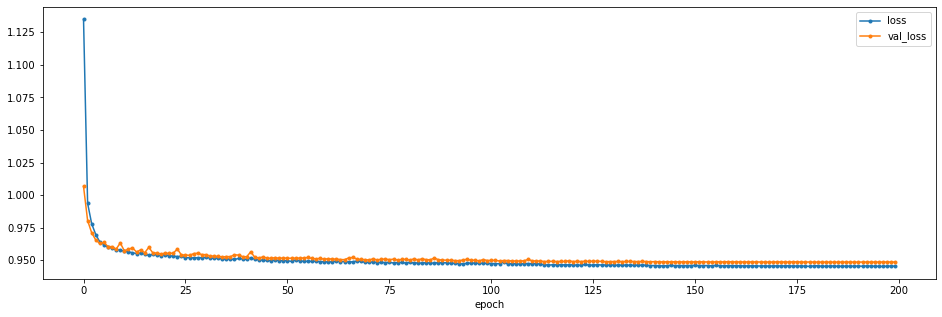

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,5))
plot_history(history, 'loss', 'val_loss');

In [ ]:
# You can export the tensorflow model and use it with the CSBDeep Fiji-Plugin
# model.export_TF()